In [ ]:
# Kernel Trick
# polynomail func - (a*b + gamma)^degree
# rbf - exp^.gama*(a.b)**2

# C - less => model is not allowed to do misclassification on training data (Max Margin Classifier) - (Overfit)
# C - high => model is allowed to do misclassification on training data (Soft Margin Classifier) - (Underfit)

In [ ]:
# (a*b + gamma)^degree , gamma = 1/2, degree = 2
# (a*b + 1/2)**2 = a2b2 + 1/4 + ab
# (a,a2,1/2):(b, b2, 1/2)

# (a,a2), (b, b2) -> model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/sample_data/mnist_train_small.csv" , header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.isnull().sum().any()

False

In [ ]:
data.shape

(20000, 785)

In [ ]:
X = data.iloc[:, 1:].values 
Y = data.iloc[:, 0].values 

X.shape, Y.shape

((20000, 784), (20000,))

7


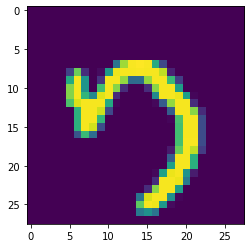

4


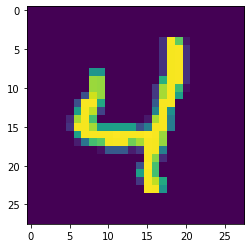

1


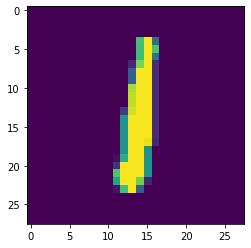

8


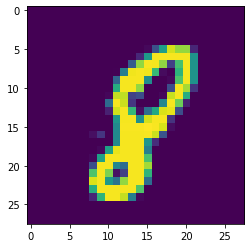

5


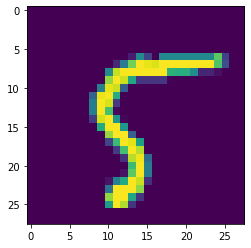

0


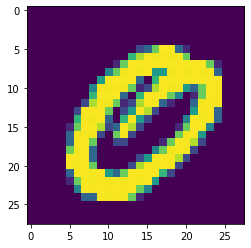

6


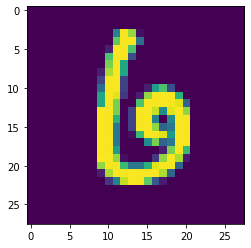

0


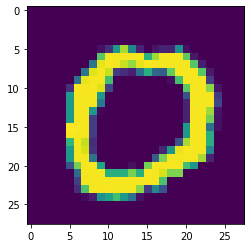

3


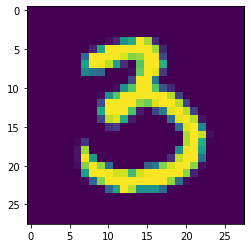

5


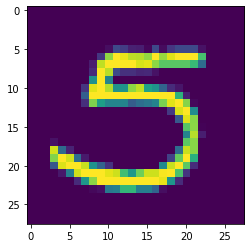

In [ ]:
for i in range(10):
  rand_idx = np.random.choice(X.shape[0])
  print(Y[rand_idx])
  plt.imshow(X[rand_idx].reshape(28, 28))
  plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Scaler = MinMaxScaler()
X = Scaler.fit_transform(X)

print(X.shape)

(20000, 784)


In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 4)
Xtrain.shape, Ytrain.shape

((16000, 784), (16000,))

In [ ]:
Xtest.shape, Ytest.shape

((4000, 784), (4000,))

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC()
model.fit(Xtrain, Ytrain)

SVC()

In [ ]:
model.score(Xtest, Ytest)

0.974

In [ ]:
C = (0.5, 1, 2, 3)

for c in C:
    model = SVC(C=c)
    model.fit(Xtrain, Ytrain)
    print('C , ', c , ' Score : ', model.score(Xtest, Ytest))

C ,  0.5  Score :  0.96225
C ,  1  Score :  0.974
C ,  2  Score :  0.97875
C ,  3  Score :  0.98
